In [71]:
import pandas as pd

In [72]:
data = pd.read_csv("salaries.csv")
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [73]:
inputs = data.drop('salary_more_then_100k', axis='columns')
target = data['salary_more_then_100k']





In [74]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical column
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

# Apply label encoding to each categorical column
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job']) 
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs.head()





,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [75]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n


,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [76]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
print(model.fit(inputs_n, target))
print(model.score(inputs_n, target))       


DecisionTreeClassifier()
1.0


In [77]:
model.predict([[2,0,1]])

c:\Users\KIIT\Downloads\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [78]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt


In [79]:
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(data = X,columns=iris.feature_names)
iris_df['species'] = y
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=iris.target_names))




1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



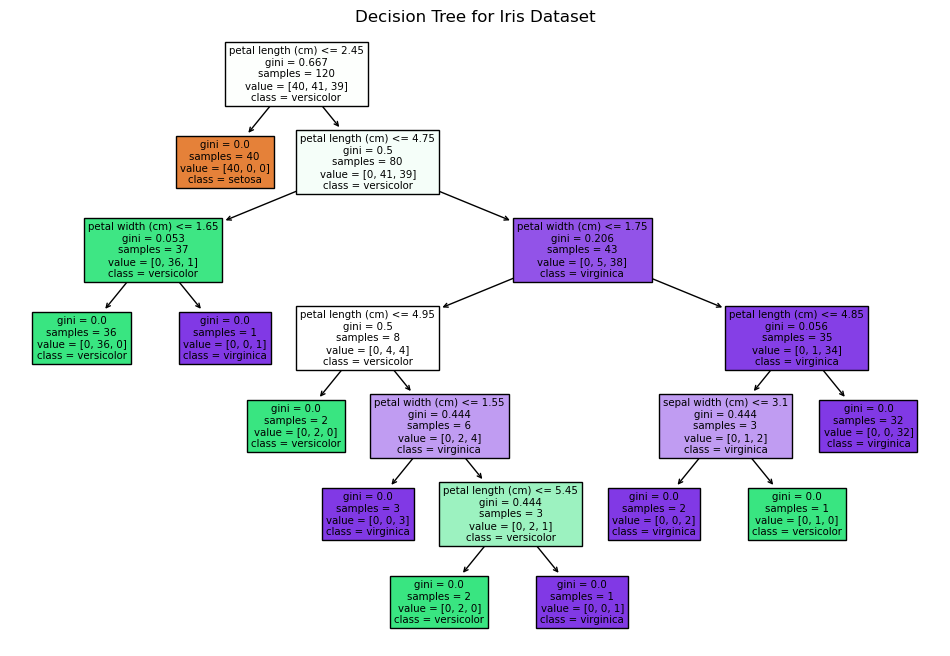

In [85]:
plt.figure(figsize=(12,8))
plot_tree(dt_model,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset")
plt.show()



Accuracy: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



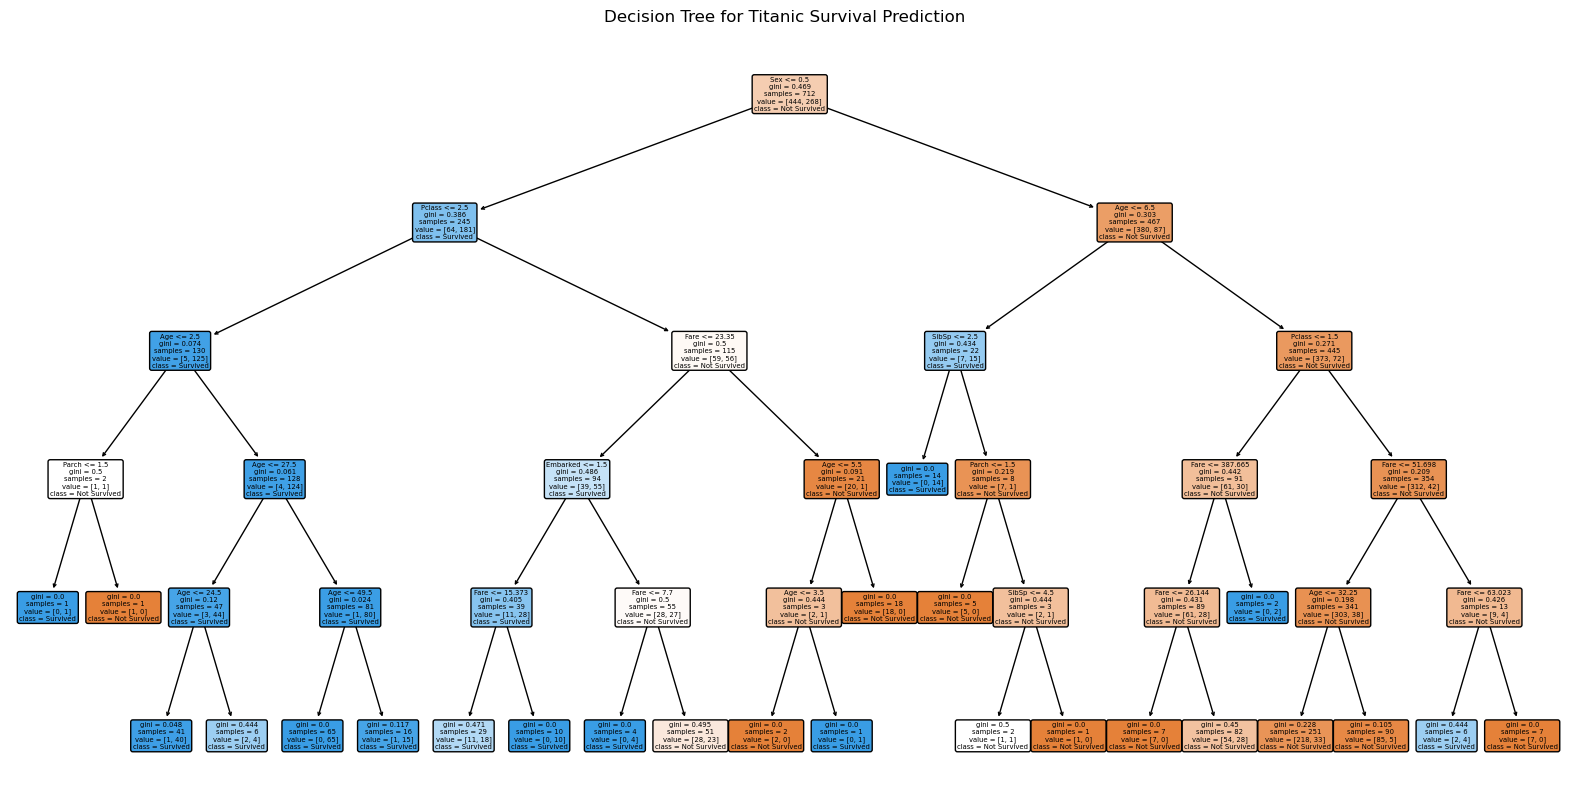


Feature Importance:
    feature  importance
1       Sex    0.540396
0    Pclass    0.186933
5      Fare    0.118280
2       Age    0.088849
3     SibSp    0.044779
6  Embarked    0.012959
4     Parch    0.007804


In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("titanic.csv")

# Data preprocessing
# 1. Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features].copy()
y = data['Survived']

# 2. Handle missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# 3. Convert categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting depth to prevent overfitting
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Print model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], 
          filled=True, rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': dt_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))